In [60]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('base_suja/base_unificada_suja.csv')

In [ ]:
df.columns

In [ ]:
colunas = [
    'data_evento'
    , 'ano_evento'
    , 'evento_MUNNOMEX'
    , 'evento_SIGLA_UF'
    , 'sum_CENTROBS'
    , 'sum_QTINST34'
    , 'sum_QTINST35'
    , 'sum_QTINST36'
    , 'sum_QTINST37'
    , 'sum_QTLEIT34'
    , 'sum_QTLEIT38'
    , 'sum_QTLEIT39'
    , 'sum_QTLEIT40'
    , 'sum_CENTRNEO'
    , 'TP_UNID_5'
    , 'TP_UNID_7'
    , 'TP_UNID_15'
    , 'TP_UNID_36'
    , 'FLAG_BASE'
]
df = df[colunas]

In [ ]:
df['mes_ano_evento'] = [str(i)[0:7] for i in df['data_evento']]

In [ ]:
df_agrupado = df.groupby(
 [
    'evento_SIGLA_UF'
    , 'evento_MUNNOMEX'
    , 'ano_evento'
 ]
    , as_index=False
).agg(
    QTINST34=pd.NamedAgg(column='sum_QTINST34', aggfunc='median')
    , QTINST35=pd.NamedAgg(column='sum_QTINST35', aggfunc='median')
    , QTINST36=pd.NamedAgg(column='sum_QTINST36', aggfunc='median')
    , QTINST37=pd.NamedAgg(column='sum_QTINST37', aggfunc='median')
    , QTLEIT34=pd.NamedAgg(column='sum_QTLEIT34', aggfunc='median')
    , QTLEIT38=pd.NamedAgg(column='sum_QTLEIT38', aggfunc='median')
    , QTLEIT39=pd.NamedAgg(column='sum_QTLEIT39', aggfunc='median')
    , QTLEIT40=pd.NamedAgg(column='sum_QTLEIT40', aggfunc='median')
    , TP_UNID_5=pd.NamedAgg(column='TP_UNID_5', aggfunc='median') 
    , TP_UNID_7=pd.NamedAgg(column='TP_UNID_7', aggfunc='median') 
    , TP_UNID_15=pd.NamedAgg(column='TP_UNID_15', aggfunc='median') 
    , TP_UNID_36=pd.NamedAgg(column='TP_UNID_36', aggfunc='median') 
    , QTD_NASCIMENTOS=pd.NamedAgg(column='data_evento', aggfunc='size') 
    )

In [ ]:
df_agrupado.to_csv('check_leitos_vs_nascimentos.csv', index=False)

In [2]:
df_agrupado = pd.read_csv('check_leitos_vs_nascimentos.csv')

In [4]:
# Separando municípios que tiveram menos que 500 nascimentos em um ano
df_agrupado['chave_mun_uf_evento'] = [f'{i}_{j}' for i, j in zip(df_agrupado['evento_SIGLA_UF'], df_agrupado['evento_MUNNOMEX'])]
df_nasc_menor_500 = df_agrupado[df_agrupado['QTD_NASCIMENTOS'] <= 500]
lista_mun_interesse = pd.unique(df_nasc_menor_500['chave_mun_uf_evento'])

In [7]:
# 4004 de um total de 4761
df_interesse = df_agrupado[df_agrupado['chave_mun_uf_evento'].isin(lista_mun_interesse)]

In [11]:
df_interesse = df_interesse.reset_index(drop=True)
df_interesse['QTINST'] = df_interesse['QTINST34'] + df_interesse['QTINST35'] + df_interesse['QTINST36'] + df_interesse['QTINST37']
df_interesse['QTLEIT'] = df_interesse['QTLEIT34'] + df_interesse['QTLEIT38'] + df_interesse['QTLEIT39'] + df_interesse['QTLEIT40']

In [32]:
df_interesse['var_QTD_NASCIMENTOS'] = df_interesse.sort_values(
    by=['evento_SIGLA_UF', 'evento_MUNNOMEX', 'ano_evento']
).groupby(
    ['evento_SIGLA_UF', 'evento_MUNNOMEX']
)['QTD_NASCIMENTOS'].pct_change()

df_interesse['var_QTINST'] = df_interesse.sort_values(
    by=['evento_SIGLA_UF', 'evento_MUNNOMEX', 'ano_evento']
).groupby(
    ['evento_SIGLA_UF', 'evento_MUNNOMEX']
)['QTINST'].pct_change()

df_interesse['var_QTLEIT'] = df_interesse.sort_values(
    by=['evento_SIGLA_UF', 'evento_MUNNOMEX', 'ano_evento']
).groupby(
    ['evento_SIGLA_UF', 'evento_MUNNOMEX']
)['QTLEIT'].pct_change()

df_interesse['var_TP_UNID_5'] = df_interesse.sort_values(
    by=['evento_SIGLA_UF', 'evento_MUNNOMEX', 'ano_evento']
).groupby(
    ['evento_SIGLA_UF', 'evento_MUNNOMEX']
)['TP_UNID_5'].pct_change()

df_interesse['var_TP_UNID_7'] = df_interesse.sort_values(
    by=['evento_SIGLA_UF', 'evento_MUNNOMEX', 'ano_evento']
).groupby(
    ['evento_SIGLA_UF', 'evento_MUNNOMEX']
)['TP_UNID_7'].pct_change()

df_interesse['var_TP_UNID_15'] = df_interesse.sort_values(
    by=['evento_SIGLA_UF', 'evento_MUNNOMEX', 'ano_evento']
).groupby(
    ['evento_SIGLA_UF', 'evento_MUNNOMEX']
)['TP_UNID_15'].pct_change()

df_interesse['var_TP_UNID_36'] = df_interesse.sort_values(
    by=['evento_SIGLA_UF', 'evento_MUNNOMEX', 'ano_evento']
).groupby(
    ['evento_SIGLA_UF', 'evento_MUNNOMEX']
)['TP_UNID_36'].pct_change()

In [35]:
# Removendo os missings
df_interesse = df_interesse.fillna(0)

In [ ]:
colunas = [
    'evento_SIGLA_UF', 'evento_MUNNOMEX', 'ano_evento', 'QTINST', 'QTLEIT', 'TP_UNID_5', 'TP_UNID_7'
    , 'TP_UNID_15', 'TP_UNID_36', 'QTD_NASCIMENTOS', 'var_QTINST', 'var_QTLEIT', 'var_TP_UNID_5'
    , 'var_TP_UNID_7', 'var_TP_UNID_15', 'var_TP_UNID_36', 'var_QTD_NASCIMENTOS'
]
# Removendo os missings
df_interesse = df_interesse[colunas]

In [52]:
# Lista para armazenar as correlações todos os anos
correlacoes = []
ufs =  pd.unique(df_interesse['evento_SIGLA_UF'])
# Agrupar os dados por município e calcular a correlação
for uf in ufs:
    subset = df_interesse.loc[(df_interesse['evento_SIGLA_UF'] == uf) & (df_interesse['ano_evento'] != 2018)]
    if len(subset) > 1:  # Certifique-se de que há dados suficientes para calcular a correlação
        correlacao_QTLEIT = subset[['var_QTLEIT', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
        correlacao_QTINST = subset[['var_QTINST', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
        correlacao_TP_UNID_5 = subset[['var_TP_UNID_5', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
        correlacao_TP_UNID_7 = subset[['var_TP_UNID_7', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
        correlacao_TP_UNID_15 = subset[['var_TP_UNID_15', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
        correlacao_TP_UNID_36 = subset[['var_TP_UNID_36', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
        correlacoes.append({'evento_SIGLA_UF': uf, 'correlacao_QTLEIT': correlacao_QTLEIT
                           , 'correlacao_QTINST': correlacao_QTINST, 'correlacao_TP_UNID_5': correlacao_TP_UNID_5
                           , 'correlacao_TP_UNID_7': correlacao_TP_UNID_7, 'correlacao_TP_UNID_15': correlacao_TP_UNID_15
                           , 'correlacao_TP_UNID_36': correlacao_TP_UNID_36})

# Criar um DataFrame com os resultados
df_correlacoes = pd.DataFrame(correlacoes)
aa=df_correlacoes[(df_correlacoes['correlacao_QTLEIT'] >= 0.5) | (df_correlacoes['correlacao_QTINST'] >= 0.5) |
              (df_correlacoes['correlacao_TP_UNID_5'] >= 0.5) | (df_correlacoes['correlacao_TP_UNID_7'] >= 0.5) |
              (df_correlacoes['correlacao_TP_UNID_15'] >= 0.5) | (df_correlacoes['correlacao_TP_UNID_36'] >= 0.5)]

In [53]:
# Considerando variações positivas e negativas tenho somente uma uf que se observa euma forte correlação
aa

,evento_SIGLA_UF,correlacao_QTLEIT,correlacao_QTINST,correlacao_TP_UNID_5,correlacao_TP_UNID_7,correlacao_TP_UNID_15,correlacao_TP_UNID_36
22,SC,0.941766,0.007365,0.006919,NaN,0.003804,-0.011198


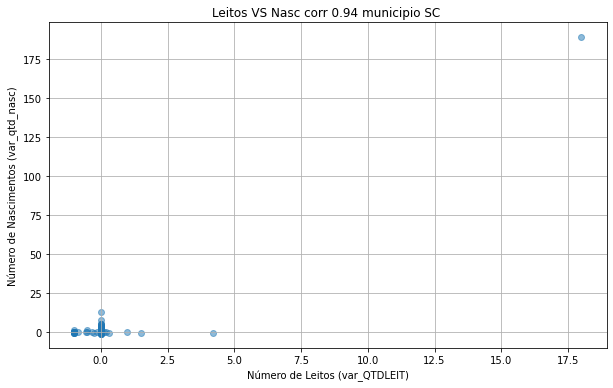

In [62]:
# grafico
# Criar gráficos de dispersão 
#for uf in aa['evento_SIGLA_UF']:
#    subset = df_interesse[df_interesse['evento_SIGLA_UF'] == uf]
#    corr = round(df_correlacoes.loc[df_correlacoes['evento_SIGLA_UF'] == uf, 'correlacao_QTLEIT'], 2)
#    plt.figure(figsize=(10, 6))
#    plt.scatter(subset['var_QTLEIT'], subset['var_QTD_NASCIMENTOS'], alpha=0.5)
#    plt.title(f'Leitos VS Nasc corr {corr.reset_index(drop=True)[0]} municipio {uf} ')
#    plt.xlabel('Número de Leitos (var_QTDLEIT)')
#    plt.ylabel('Número de Nascimentos (var_qtd_nasc)')
#    plt.grid(True)
#    plt.show()

In [54]:
# Lista para armazenar as correlações todos os anos
correlacoes_ano = []
ufs =  pd.unique(df_interesse['evento_SIGLA_UF'])
# Agrupar os dados por município e calcular a correlação
for uf in ufs:
    for ano in [2019, 2020, 2021, 2022]:
        subset = df_interesse.loc[(df_interesse['evento_SIGLA_UF'] == uf) & (df_interesse['ano_evento'] == ano)]
        if len(subset) > 1:  # Certifique-se de que há dados suficientes para calcular a correlação
            correlacao_QTLEIT = subset[['var_QTLEIT', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
            correlacao_QTINST = subset[['var_QTINST', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
            correlacao_TP_UNID_5 = subset[['var_TP_UNID_5', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
            correlacao_TP_UNID_7 = subset[['var_TP_UNID_7', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
            correlacao_TP_UNID_15 = subset[['var_TP_UNID_15', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
            correlacao_TP_UNID_36 = subset[['var_TP_UNID_36', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
            correlacoes_ano.append({'evento_SIGLA_UF': uf, 'ano_evento': ano,'correlacao_QTLEIT': correlacao_QTLEIT
                               , 'correlacao_QTINST': correlacao_QTINST, 'correlacao_TP_UNID_5': correlacao_TP_UNID_5
                               , 'correlacao_TP_UNID_7': correlacao_TP_UNID_7, 'correlacao_TP_UNID_15': correlacao_TP_UNID_15
                               , 'correlacao_TP_UNID_36': correlacao_TP_UNID_36})

# Criar um DataFrame com os resultados
df_correlacoes_ano = pd.DataFrame(correlacoes_ano)
bb=df_correlacoes_ano[(df_correlacoes_ano['correlacao_QTLEIT'] >= 0.5) | (df_correlacoes_ano['correlacao_QTINST'] >= 0.5) |
              (df_correlacoes_ano['correlacao_TP_UNID_5'] >= 0.5) | (df_correlacoes_ano['correlacao_TP_UNID_7'] >= 0.5) |
              (df_correlacoes_ano['correlacao_TP_UNID_15'] >= 0.5) | (df_correlacoes_ano['correlacao_TP_UNID_36'] >= 0.5)]

In [55]:
bb

,evento_SIGLA_UF,ano_evento,correlacao_QTLEIT,correlacao_QTINST,correlacao_TP_UNID_5,correlacao_TP_UNID_7,correlacao_TP_UNID_15,correlacao_TP_UNID_36
19,BA,2022,0.713484,0.591069,-0.019084,0.010401,0.014231,0.012766
69,RJ,2020,-0.274086,-0.111427,-0.030857,0.997754,NaN,-0.217234
79,RO,2022,0.029778,NaN,0.609729,NaN,-0.220128,-0.023651
91,SC,2022,0.989492,0.018186,0.018768,NaN,0.005237,-0.022781


In [63]:
# agora vou considerar somente as variações negativas
# Lista para armazenar as correlações todos os anos
correlacoes = []
ufs =  pd.unique(df_interesse['evento_SIGLA_UF'])
# Agrupar os dados por município e calcular a correlação
for uf in ufs:
    subset = df_interesse.loc[(df_interesse['evento_SIGLA_UF'] == uf) & (df_interesse['ano_evento'] != 2018) &
                              (df_interesse['var_QTD_NASCIMENTOS'] < 0)]
    if len(subset) > 1:  # Certifique-se de que há dados suficientes para calcular a correlação
        correlacao_QTLEIT = subset[['var_QTLEIT', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
        correlacao_QTINST = subset[['var_QTINST', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
        correlacao_TP_UNID_5 = subset[['var_TP_UNID_5', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
        correlacao_TP_UNID_7 = subset[['var_TP_UNID_7', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
        correlacao_TP_UNID_15 = subset[['var_TP_UNID_15', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
        correlacao_TP_UNID_36 = subset[['var_TP_UNID_36', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
        correlacoes.append({'evento_SIGLA_UF': uf, 'correlacao_QTLEIT': correlacao_QTLEIT
                           , 'correlacao_QTINST': correlacao_QTINST, 'correlacao_TP_UNID_5': correlacao_TP_UNID_5
                           , 'correlacao_TP_UNID_7': correlacao_TP_UNID_7, 'correlacao_TP_UNID_15': correlacao_TP_UNID_15
                           , 'correlacao_TP_UNID_36': correlacao_TP_UNID_36})

# Criar um DataFrame com os resultados
df_correlacoes = pd.DataFrame(correlacoes)
aa_=df_correlacoes[(df_correlacoes['correlacao_QTLEIT'] >= 0.5) | (df_correlacoes['correlacao_QTINST'] >= 0.5) |
              (df_correlacoes['correlacao_TP_UNID_5'] >= 0.5) | (df_correlacoes['correlacao_TP_UNID_7'] >= 0.5) |
              (df_correlacoes['correlacao_TP_UNID_15'] >= 0.5) | (df_correlacoes['correlacao_TP_UNID_36'] >= 0.5)]

In [65]:
aa_

,evento_SIGLA_UF,correlacao_QTLEIT,correlacao_QTINST,correlacao_TP_UNID_5,correlacao_TP_UNID_7,correlacao_TP_UNID_15,correlacao_TP_UNID_36
0,AC,0.150535,-0.120322,NaN,NaN,NaN,NaN
1,AL,0.069301,0.094773,-0.081300,NaN,-0.033162,0.137145
2,AM,0.053078,0.130997,-0.165984,0.139147,0.169383,0.097340
3,AP,NaN,NaN,NaN,NaN,0.017879,0.135476
4,BA,0.073299,0.051280,-0.045685,-0.011675,0.117878,0.050511
5,CE,0.044511,0.056634,0.010611,NaN,-0.027764,-0.057349
6,ES,0.008582,0.167403,-0.223350,NaN,-0.033172,-0.020728
7,GO,0.120831,-0.020894,0.086026,-0.039866,-0.025483,0.062218
8,MA,0.084638,0.043159,-0.040567,-0.028310,-0.002792,-0.010056
9,MG,0.074561,0.031900,0.061063,NaN,0.041483,0.096363


In [66]:
# Lista para armazenar as correlações todos os anos e somente variacoes negativas
correlacoes_ano = []
ufs =  pd.unique(df_interesse['evento_SIGLA_UF'])
# Agrupar os dados por município e calcular a correlação
for uf in ufs:
    for ano in [2019, 2020, 2021, 2022]:
        subset = df_interesse.loc[(df_interesse['evento_SIGLA_UF'] == uf) & (df_interesse['ano_evento'] == ano) &
                                 (df_interesse['var_QTD_NASCIMENTOS'] < 0)]
        if len(subset) > 1:  # Certifique-se de que há dados suficientes para calcular a correlação
            correlacao_QTLEIT = subset[['var_QTLEIT', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
            correlacao_QTINST = subset[['var_QTINST', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
            correlacao_TP_UNID_5 = subset[['var_TP_UNID_5', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
            correlacao_TP_UNID_7 = subset[['var_TP_UNID_7', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
            correlacao_TP_UNID_15 = subset[['var_TP_UNID_15', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
            correlacao_TP_UNID_36 = subset[['var_TP_UNID_36', 'var_QTD_NASCIMENTOS']].corr().iloc[0, 1]
            correlacoes_ano.append({'evento_SIGLA_UF': uf, 'ano_evento': ano,'correlacao_QTLEIT': correlacao_QTLEIT
                               , 'correlacao_QTINST': correlacao_QTINST, 'correlacao_TP_UNID_5': correlacao_TP_UNID_5
                               , 'correlacao_TP_UNID_7': correlacao_TP_UNID_7, 'correlacao_TP_UNID_15': correlacao_TP_UNID_15
                               , 'correlacao_TP_UNID_36': correlacao_TP_UNID_36})

# Criar um DataFrame com os resultados
df_correlacoes_ano = pd.DataFrame(correlacoes_ano)
bb_=df_correlacoes_ano[(df_correlacoes_ano['correlacao_QTLEIT'] >= 0.5) | (df_correlacoes_ano['correlacao_QTINST'] >= 0.5) |
              (df_correlacoes_ano['correlacao_TP_UNID_5'] >= 0.5) | (df_correlacoes_ano['correlacao_TP_UNID_7'] >= 0.5) |
              (df_correlacoes_ano['correlacao_TP_UNID_15'] >= 0.5) | (df_correlacoes_ano['correlacao_TP_UNID_36'] >= 0.5)]

In [67]:
bb_

,evento_SIGLA_UF,ano_evento,correlacao_QTLEIT,correlacao_QTINST,correlacao_TP_UNID_5,correlacao_TP_UNID_7,correlacao_TP_UNID_15,correlacao_TP_UNID_36
14,AP,2021,NaN,NaN,NaN,NaN,NaN,0.667254
46,MT,2021,0.467139,0.417937,0.511460,NaN,NaN,0.152306
77,RO,2020,NaN,-0.279705,-0.285785,NaN,-0.049962,0.534710
78,RO,2021,NaN,NaN,NaN,NaN,NaN,0.554326
